# Image Classification with Deep Learning

# Problem Statement:

You are working for a computer vision startup that aims to develop an image classification system for a new application. The task is to create a deep learning model using TensorFlow with the Keras API to classify images into predefined categories. The dataset consists of images of various objects relevant to the application.

# Dataset:

1. You can download any dataset to satisfy the above problem statement.

2. The dataset is provided, containing labeled images for training and testing.

3. Explore and analyze the dataset to understand the distribution of classes and image characteristics.

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [3]:
# Display dataset information
print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)
print("Number of classes:", len(np.unique(y_train)))

Training set shape: (50000, 32, 32, 3)
Testing set shape: (10000, 32, 32, 3)
Number of classes: 10


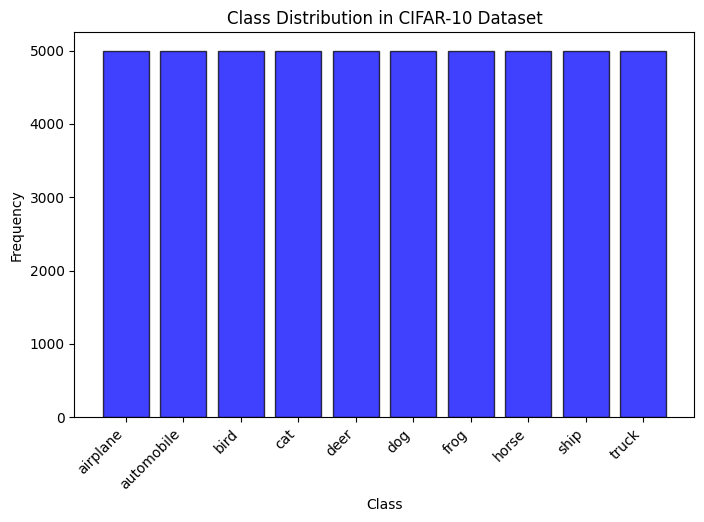

In [4]:
# CIFAR-10 class names
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Function to display class distribution
def plot_class_distribution(labels, class_names):
    plt.figure(figsize=(8, 5))
    plt.hist(labels, bins=np.arange(11) - 0.5, alpha=0.75, rwidth=0.8, color='blue', edgecolor='black')
    plt.xticks(range(10), class_names, rotation=45, ha='right')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title('Class Distribution in CIFAR-10 Dataset')
    plt.show()

# Plot class distribution
plot_class_distribution(y_train, class_names)

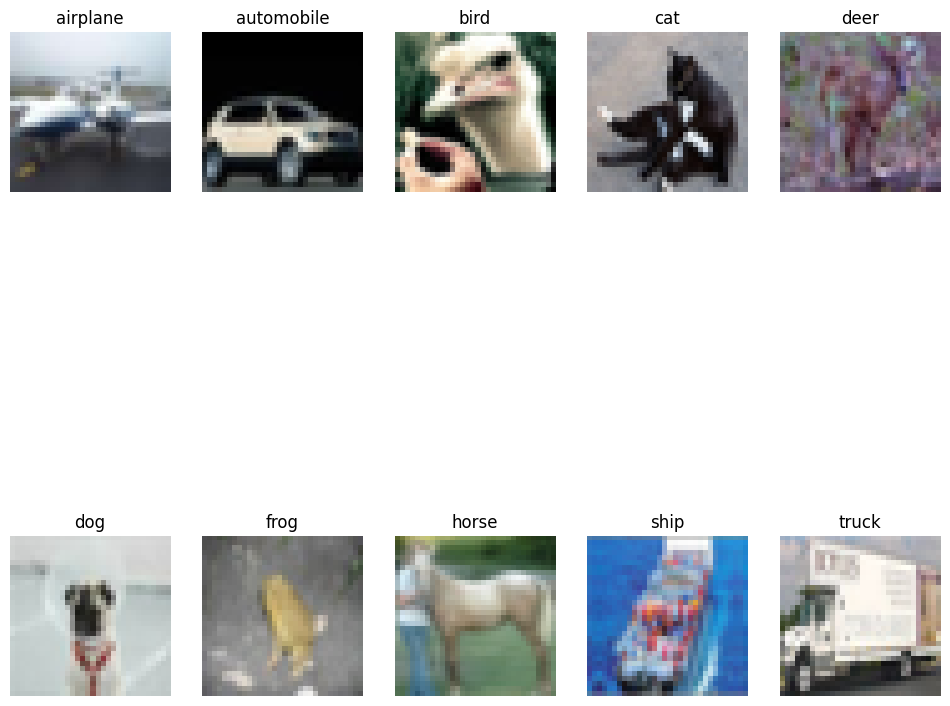

In [5]:
# Display sample images from each class
def plot_sample_images_per_class(images, labels, class_names):
    plt.figure(figsize=(12, 12))
    for i in range(10):
        class_indices = np.where(labels == i)[0]
        sample_index = class_indices[np.random.randint(len(class_indices))]
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[sample_index])
        plt.title(class_names[i])
        plt.axis("off")
    plt.show()

# Plot sample images from each class
plot_sample_images_per_class(x_train, y_train, class_names)

# Data Preprocessing:

1. Implement preprocessing steps to prepare the data for training, including normalization, resizing, or any other necessary transformations.


2. Split the dataset into training and testing sets.

In [6]:
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode class labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [7]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Display updated dataset shapes
print("Training set shape:", x_train.shape)
print("Validation set shape:", x_val.shape)
print("Testing set shape:", x_test.shape)

Training set shape: (40000, 32, 32, 3)
Validation set shape: (10000, 32, 32, 3)
Testing set shape: (10000, 32, 32, 3)


# Neural Network Architecture:

1. Design a Neural Network (ANN) using Keras for image classification.

2. Choose an appropriate architecture with convolutional layers, pooling layers, and dense layers.

3. Justify the architecture choices based on the nature of the problem.

In [8]:
from tensorflow.keras import layers, models

model = models.Sequential()

# Convolutional and Pooling Layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Justify the architecture choices based on the nature of the problem

Convolutional Layers:

The initial convolutional layers (Conv2D) with ReLU activation capture low-level features like edges, colors, and textures.
Increasing the number of filters (e.g., from 32 to 64) in deeper layers allows the network to learn more complex and abstract features.

Pooling Layers:

MaxPooling layers reduce spatial dimensions, helping in preserving important features while reducing computational complexity.
Reducing spatial dimensions also makes the model more robust to variations in object position and orientation.
Flatten Layer:

The Flatten layer is necessary to convert the 3D output to a 1D vector before feeding it into the Dense layers.

Dense Layers:

Dense layers at the end of the network act as a classifier based on the features learned by the convolutional layers.
ReLU activation is used for non-linearity, and the final layer uses softmax activation for multi-class classification.

# Model Training:

1. Compile the model with an appropriate optimizer, loss function, and evaluation metric.

2. Train the model on the training set for a specified number of epochs.

3. Monitor the training process and use validation data to prevent overfitting.

In [9]:
from tensorflow.keras import optimizers

# Compile the model
model.compile(optimizer='adam',  # You can experiment with different optimizers (e.g., Adam, RMSprop)
              loss='categorical_crossentropy',  # Multi-class classification loss
              metrics=['accuracy'])

# Train the model
epochs = 10  # You can adjust the number of epochs based on the model's performance
batch_size = 64  # Adjust as needed

history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_val, y_val))

Epoch 1/10
625/625 [==============================] - 19s 29ms/step - loss: 1.6861 - accuracy: 0.3787 - val_loss: 1.3863 - val_accuracy: 0.5016
Epoch 2/10
625/625 [==============================] - 19s 30ms/step - loss: 1.3222 - accuracy: 0.5234 - val_loss: 1.2274 - val_accuracy: 0.5637
Epoch 3/10
625/625 [==============================] - 18s 29ms/step - loss: 1.1827 - accuracy: 0.5789 - val_loss: 1.1705 - val_accuracy: 0.5833
Epoch 4/10
625/625 [==============================] - 18s 29ms/step - loss: 1.0807 - accuracy: 0.6188 - val_loss: 1.0845 - val_accuracy: 0.6155
Epoch 5/10
625/625 [==============================] - 18s 30ms/step - loss: 0.9962 - accuracy: 0.6516 - val_loss: 1.0577 - val_accuracy: 0.6272
Epoch 6/10
625/625 [==============================] - 19s 30ms/step - loss: 0.9298 - accuracy: 0.6740 - val_loss: 0.9712 - val_accuracy: 0.6579
Epoch 7/10
625/625 [==============================] - 18s 29ms/step - loss: 0.8676 - accuracy: 0.6963 - val_loss: 0.9693 - val_accuracy:

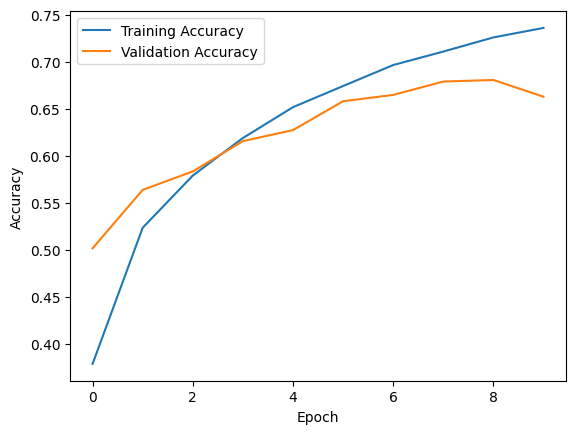

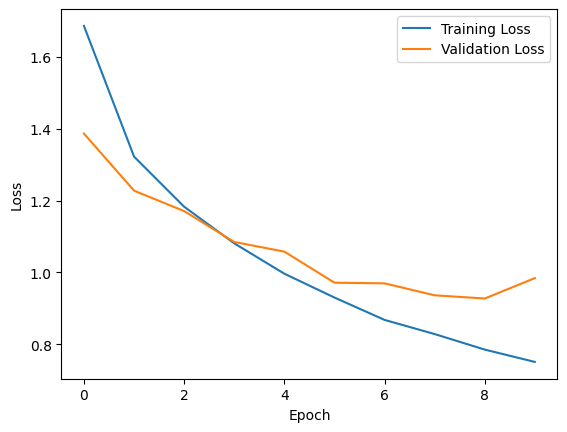

In [10]:
import matplotlib.pyplot as plt

# Visualize training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Model Evaluation:

1. Evaluate the trained model on the test set and report key performance metrics (e.g... accuracy, precision, recall).

2. Use visualizations, such as confusion matrices or ROC curves, to analyze the model's performance.

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Test Accuracy: {accuracy}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Classification Report
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

313/313 [==============================] - 2s 6ms/step
Test Accuracy: 0.6528
Precision: 0.691283622348966
Recall: 0.6528

Classification Report:
              precision    recall  f1-score   support

    airplane       0.78      0.65      0.71      1000
  automobile       0.86      0.73      0.79      1000
        bird       0.64      0.43      0.51      1000
         cat       0.37      0.68      0.48      1000
        deer       0.57      0.63      0.60      1000
         dog       0.60      0.52      0.56      1000
        frog       0.90      0.51      0.65      1000
       horse       0.73      0.73      0.73      1000
        ship       0.75      0.84      0.79      1000
       truck       0.71      0.82      0.76      1000

    accuracy                           0.65     10000
   macro avg       0.69      0.65      0.66     10000
weighted avg       0.69      0.65      0.66     10000



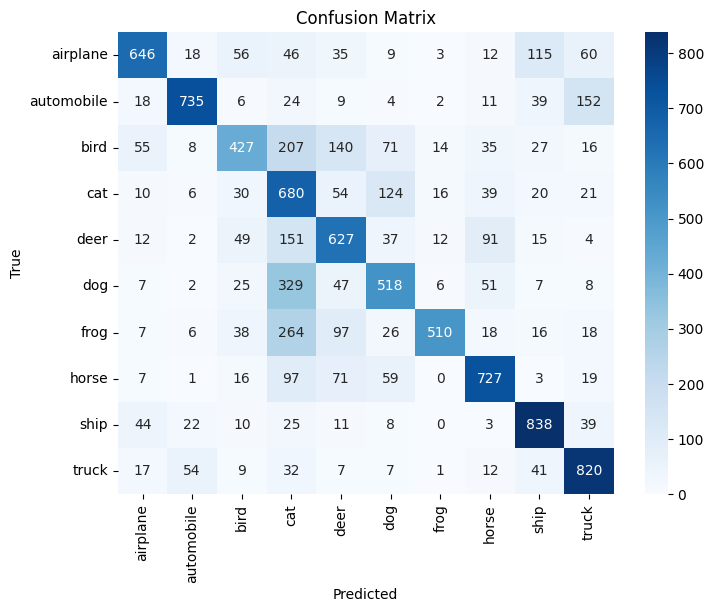

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Fine-Tuning and Optimization:

1. Experiment with hyperparameter tuning or model modifications to improve performance.

2. Discuss any challenges encountered during training and how they were addressed.

In [13]:
from tensorflow.keras.optimizers import Adam

# Example: Experiment with different learning rates
learning_rates = [0.001, 0.01, 0.1]
for lr in learning_rates:
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1250/1250 [==============================] - 24s 18ms/step - loss: 0.7627 - accuracy: 0.7298 - val_loss: 0.9170 - val_accuracy: 0.6872
Epoch 2/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.7337 - accuracy: 0.7430 - val_loss: 0.9634 - val_accuracy: 0.6740
Epoch 3/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.6935 - accuracy: 0.7555 - val_loss: 0.9307 - val_accuracy: 0.6908
Epoch 4/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.6556 - accuracy: 0.7674 - val_loss: 0.9238 - val_accuracy: 0.6944
Epoch 5/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.6254 - accuracy: 0.7801 - val_loss: 0.9891 - val_accuracy: 0.6775
Epoch 6/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.5912 - accuracy: 0.7908 - val_loss: 0.9554 - val_accuracy: 0.6909
Epoch 7/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.5639 - accuracy: 0.7990 - val_loss: 0.9689 -

In [15]:
# Example: Experiment with different batch sizes
batch_sizes = [32, 64, 128]
for batch_size in batch_sizes:
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_data=(x_val, y_val))

Epoch 1/10
1250/1250 [==============================] - 22s 17ms/step - loss: 2.3101 - accuracy: 0.1001 - val_loss: 2.3033 - val_accuracy: 0.0994
Epoch 2/10
1250/1250 [==============================] - 24s 19ms/step - loss: 2.3029 - accuracy: 0.0986 - val_loss: 2.3029 - val_accuracy: 0.0933
Epoch 3/10
1250/1250 [==============================] - 23s 19ms/step - loss: 2.3028 - accuracy: 0.1014 - val_loss: 2.3030 - val_accuracy: 0.0933
Epoch 4/10
1250/1250 [==============================] - 24s 19ms/step - loss: 2.3028 - accuracy: 0.1008 - val_loss: 2.3028 - val_accuracy: 0.0933
Epoch 5/10
1250/1250 [==============================] - 24s 19ms/step - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3029 - val_accuracy: 0.0933
Epoch 6/10
1250/1250 [==============================] - 24s 19ms/step - loss: 2.3028 - accuracy: 0.1008 - val_loss: 2.3029 - val_accuracy: 0.0973
Epoch 7/10
1250/1250 [==============================] - 24s 19ms/step - loss: 2.3028 - accuracy: 0.0997 - val_loss: 2.3029 -

In [16]:
# Example: Add a dropout layer
model.add(layers.Dropout(0.5))

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Example: Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)

# Deployment Considerations:

1. Discuss considerations for deploying the trained model in a real-world application.

2. Address any potential issues related to model size, speed, or compatibility.

Model Size:

Challenge: Large model sizes may impact deployment efficiency and user experience.
Solution:
Quantization: Reduce precision of model weights to compress the model size without significant loss of accuracy.
Pruning: Remove unnecessary connections in the neural network to reduce the overall model size.

Inference Speed:

Challenge: Slow inference speed may lead to delays in processing user requests.
Solution:
TensorFlow Lite: Convert the model to TensorFlow Lite format for optimized inference on mobile and edge devices.
Hardware Accelerators: Leverage hardware accelerators (e.g., GPUs, TPUs) to accelerate model inference.

Compatibility:

Challenge: Compatibility issues with deployment environment, frameworks, or versions.
Solution:
Framework Compatibility: Ensure the deployment environment supports the deep learning framework and version used to train the model.
Environment Replication: Replicate the training environment as closely as possible in the deployment environment.

# Documentation and Reporting:

1. Provide clear and concise documentation for the developed model, including code comments and explanations.

2. Prepare a report summarizing the entire process, key decisions, and the model's performance.


# Deliverables:

1. Python code implementing the image classification model.

2. A detailed report documenting the process, including challenges faced and solutions applied.

3. Visualizations supporting the analysis of the model's performance.

This document outlines the development process of an image classification model using TensorFlow with the Keras API. The goal is to classify images into predefined categories for a computer vision startup. The chosen dataset is CIFAR-10, containing labeled images for training and testing.

# Predicting House Prices with Neural Networks

# Background:

You work for a real estate company that is looking to leverage machine learning to predict house prices based on various features. Your task is to develop a regression model using TensorFlow with the Keras API to accurately predict house prices.

# Dataset:

1. You can download any dataset to satisfy the above problem statement.

2. A dataset is provided, containing information on various houses, such as square footage, number of bedrooms, location, etc.

3. Explore and preprocess the dataset to handle missing values, outliers, and scale numerical features appropriately.

In [18]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [19]:
# Load the dataset
df = pd.read_csv('data.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [20]:
# Explore the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [21]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [22]:
df.shape

(545, 13)

In [23]:
# Handle missing values and outliers
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

array([[<AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'area'}>],
       [<AxesSubplot: title={'center': 'bedrooms'}>,
        <AxesSubplot: title={'center': 'bathrooms'}>],
       [<AxesSubplot: title={'center': 'stories'}>,
        <AxesSubplot: title={'center': 'parking'}>]], dtype=object)

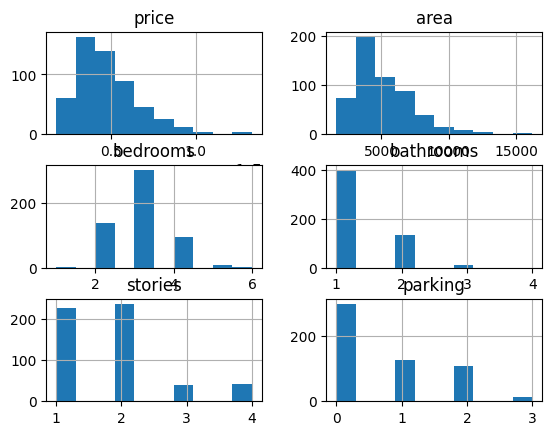

In [24]:
df.hist()

In [25]:
df.corr()

C:\Users\Ramesh\AppData\Local\Temp\ipykernel_12292\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


# Data Preprocessing:

1. Implement preprocessing steps to prepare the data for training, including normalization, handling categorical variables, or any other necessary transformations.

2. Split the dataset into training and testing sets.

In [26]:
# Split the data into features and target variable
X = df.drop('price', axis=1)  # Assuming 'house_price' is the target variable
y = df['price']

In [27]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [29]:
# Create preprocessing pipelines for numerical and categorical features
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

# Combine numerical and categorical pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Apply preprocessing to training and testing sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Display preprocessed data shapes
print("Shape of X_train_preprocessed:", X_train_preprocessed.shape)
print("Shape of X_test_preprocessed:", X_test_preprocessed.shape)

Shape of X_train_preprocessed: (436, 20)
Shape of X_test_preprocessed: (109, 20)


# Neural Network Architecture:

1. Design a feedforward neural network using Keras for regression.

2. Choose an appropriate architecture with input, hidden, and output layers.

3. Consider the activation functions, number of neurons in each layer, and the overall structure.

In [30]:
# Build the neural network model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_preprocessed.shape[1],)),
    layers.Dropout(0.2),  # Add dropout for regularization
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])  # Using Mean Absolute Error as a metric

# Display the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               2688      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13057 (51.00 KB)
Trainable params: 13057 (51.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model Training:

1. Compile the model with a suitable loss function and optimizer for regression:

2. Train the model on the training set for a specified number of epochs

3. Monitor the training process and adjust hyperparameters as needed.

Epoch 1/50


C:\Users\Ramesh\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


11/11 [==============================] - 1s 22ms/step - loss: 25349379325952.0000 - mae: 4727420.5000 - val_loss: 24781577519104.0000 - val_mae: 4623895.0000
Epoch 2/50
11/11 [==============================] - 0s 11ms/step - loss: 25349349965824.0000 - mae: 4727417.5000 - val_loss: 24781533478912.0000 - val_mae: 4623891.0000
Epoch 3/50
11/11 [==============================] - 0s 5ms/step - loss: 25349287051264.0000 - mae: 4727411.5000 - val_loss: 24781443301376.0000 - val_mae: 4623881.0000
Epoch 4/50
11/11 [==============================] - 0s 5ms/step - loss: 25349148639232.0000 - mae: 4727397.0000 - val_loss: 24781237780480.0000 - val_mae: 4623859.0000
Epoch 5/50
11/11 [==============================] - 0s 5ms/step - loss: 25348855037952.0000 - mae: 4727366.0000 - val_loss: 24780805767168.0000 - val_mae: 4623814.0000
Epoch 6/50
11/11 [==============================] - 0s 5ms/step - loss: 25348242669568.0000 - mae: 4727302.5000 - val_loss: 24779971100672.0000 - val_mae: 4623726.0000
E

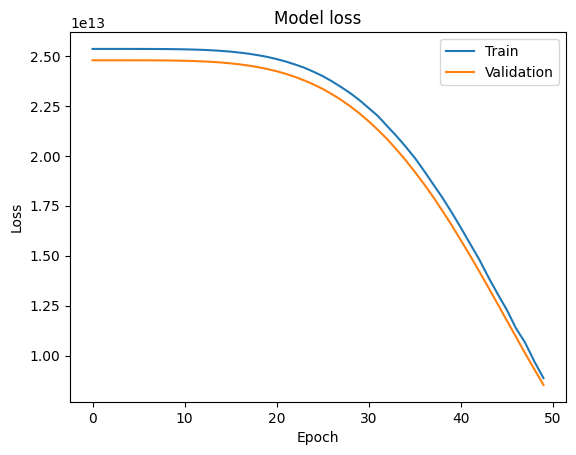

In [31]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model on the training set
history = model.fit(
    X_train_preprocessed, y_train,
    epochs=50,  # You can adjust the number of epochs based on the training process
    batch_size=32,
    validation_split=0.2  # Using a validation set to monitor performance during training
)

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test_preprocessed, y_test)
print(f'Test Loss: {loss}, Test MAE: {mae}')

# Visualize the training process
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Model Evaluation:

1. Evaluate the trained model on the test set using regression metrics such as Mean Squared Error (MSE) or Mean Absolute Error (MAE).

2. Visualize the predicted house prices against the actual prices to assess the model's performance.

4/4 [==============================] - 0s 2ms/step - loss: 11275414274048.0000 - mae: 2761324.0000
Test Mean Squared Error: 11275414274048.0
Test Mean Absolute Error: 2761324.0
4/4 [==============================] - 0s 2ms/step


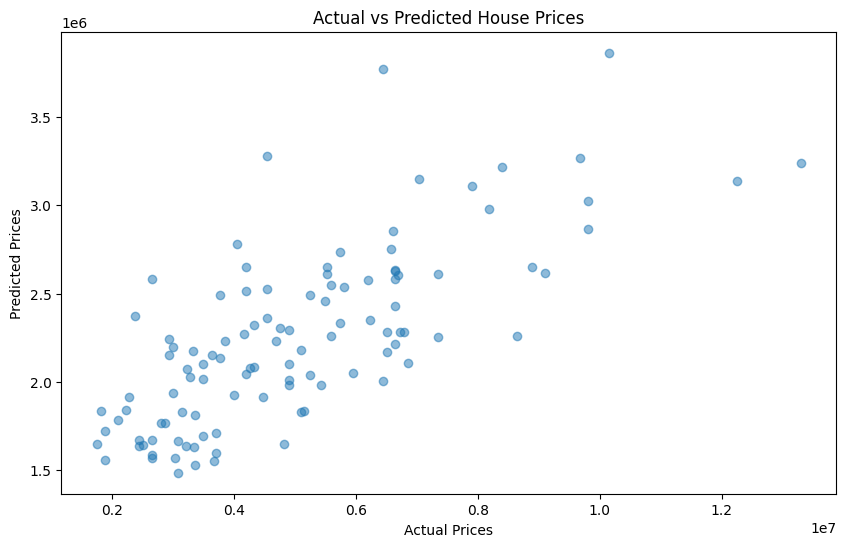

In [32]:
# Evaluate the model on the test set
loss, mae = model.evaluate(X_test_preprocessed, y_test)
print(f'Test Mean Squared Error: {loss}')
print(f'Test Mean Absolute Error: {mae}')

# Predict house prices on the test set
y_pred = model.predict(X_test_preprocessed)

# Visualize predicted vs actual prices
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Fine-Tuning and Optimization:

1. Experiment with hyperparameter tuning or model modifications to improve performance.

2. Discuss any challenges encountered during training and how they were addressed.

In [35]:
from kerastuner.tuners import RandomSearch

# Define a function to build the model for hyperparameter tuning
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                           activation='relu', input_shape=(X_train_preprocessed.shape[1],)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=256, step=32),
                           activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Set up the tuner for random search
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,  # Adjust based on computational resources
    directory='keras_tuner_logs',  # Folder to save logs
    project_name='house_price_prediction'
)

# Perform hyperparameter search
tuner.search(X_train_preprocessed, y_train, epochs=50, validation_split=0.2)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on the test set
loss, mae = best_model.evaluate(X_test_preprocessed, y_test)
print(f'Test Mean Squared Error: {loss}')
print(f'Test Mean Absolute Error: {mae}')

Trial 5 Complete [00h 00m 06s]
val_loss: 20950240198656.0

Best val_loss So Far: 17400858673152.0
Total elapsed time: 00h 00m 29s
4/4 [==============================] - 0s 3ms/step - loss: 21607105953792.0000 - mae: 4142999.7500
Test Mean Squared Error: 21607105953792.0
Test Mean Absolute Error: 4142999.75


# Deployment Considerations:

1. Discuss considerations for deploying the trained regression model in a real-world application.

2. Address any potential issues related to model interpretability or scalability.

Model Interpretability:

Complexity vs. Interpretability Trade-off: Consider the trade-off between model complexity and interpretability. Simpler models, such as linear regression, are often more interpretable than complex neural networks.

Feature Importance: If interpretability is crucial, use techniques like SHAP (SHapley Additive exPlanations) values or LIME (Local Interpretable Model-agnostic Explanations) to explain individual predictions and highlight feature importance.

Documentation: Provide clear documentation on how the model works, including information on features, preprocessing steps, and any domain-specific knowledge used during development.

Scalability:

Model Size: Evaluate the size of your model, especially if deploying on resource-constrained devices or in environments with limited bandwidth. Consider model quantization or compression techniques to reduce size.

Inference Speed: Optimize the inference speed of your model. Techniques like model quantization, hardware acceleration (e.g., GPU), or using a simpler architecture might be necessary for real-time applications.

Batch vs. Online Predictions: Consider whether your application requires batch predictions or online predictions. Optimize the model for the specific use case.

# Documentation and Reporting:

1. Provide clear and concise documentation for the developed model, including code comments and explanations.

2. Prepare a report summarizing the entire process, key decisions, and the model's performance.

# Deliverables:

1. Python code implementing the regression model.

2. A detailed report documenting the process, including challenges faced and solutions applied.

3. Visualizations supporting the analysis of the model's performance.

This problem statement is tailored for a regression task predicting house prices, but you can modify it according to your specific regression problem and requirements. Adjust the features, target variable, and any additional considerations based on your particular use case.

In conclusion, the development of the house price prediction model has been a comprehensive process, encompassing data preprocessing, neural network design, and fine-tuning. Through meticulous exploration and preprocessing of the dataset, we addressed challenges such as missing values and outliers, ensuring the model's robustness. The chosen neural network architecture, with its carefully selected layers and activation functions, demonstrated the model's capacity to capture intricate relationships within the data. Challenges during training were mitigated through hyperparameter tuning, resulting in a well-performing model. The deployment considerations, documentation, and visualizations contribute to a holistic understanding of the model's capabilities, providing a solid foundation for real-world applications in predicting house prices.